In [400]:
%matplotlib inline
import pandas as pd
import numpy as np
from functools import reduce
import os
import glob
import string
import csv
import numpy as np
import scipy as sp
import plotly.plotly as py
import matplotlib.pyplot as plt
import numbers
import decimal
import copy

In [401]:
cwd = os.getcwd()
cwd
path =r'C:\\Users\\pras\\Documents\\WORK_PROJECTS\\Gossau_Sommerau\\Profiles\\Profiles_HSLU' # use your path
os.chdir(path)

# Import data of all parcels into single data frame

In [402]:
# glob.glob('data*.csv') - returns List[str]
# pd.read_csv(f) - returns pd.DataFrame()
# for f in glob.glob() - returns a List[DataFrames]
# pd.concat() - returns one pd.DataFrame()

df = reduce(lambda left, right:pd.merge(left,right),[pd.read_csv(f,header=[0,1,2]) for f in glob.glob("*.csv")])
df.columns = df.columns.map('_'.join)


# Import 'Scenarios.csv' as list and clean list

In [403]:
path =r'C:\\Users\\pras\\Documents\\WORK_PROJECTS\\Gossau_Sommerau\\Profiles' # use your path
os.chdir(path)

In [404]:
sub=[c for c in string.ascii_uppercase[0:17]]
#print(sub)

Scenario_list=[]
with open('Scenarios.csv') as csvfile:
    readCSV = csv.reader(csvfile)
    for row in readCSV:
        #print(row)
        Scenario_list.append(row)
        #if element in sub and element in row:
            #print(a)
            #Scenario_list[key] = value
            #print(row[0,0])
            #print(row[0],row[1],row[2],)

#print(Scenario_list)

In [405]:
no_integers=[]
for j in Scenario_list:
    #no_integers.append([x for x in j if x])
    no_integers.append([x for x in j if not (x.isdigit()) and x in j if x ]) 
                                        #or x[0] == '-' and x[1:].isdigit())])

#print(no_integers)

no_integers= no_integers[1::]
#print(no_integers)

# Create dictionary of scenarios based on created scenario list

In [406]:
#Scenario_dictionary={}
Scenario_dictionary=dict(list(enumerate(no_integers)))
#for i in range(1,31):
#    print(Scenario_dictionary)

#print(Scenario_dictionary)    


In [407]:
seq = [df.columns]
required_demands={}
for i in range(0,30):
    #print(Scenario_dictionary[i])
    for x in Scenario_dictionary[i]:
        for text in seq:
            for j in text:
                    if x == j[0]:
                        #print(x,j)
                        if i not in required_demands:
                            required_demands[i] = []
                        required_demands[i].append(j)
                        #required_demands[i] = []
                        #required_demands[i].append(j)
                        
#print(required_demands)                    
 

# Create another dictionary which additonally includes the demands for each scenario

In [408]:
Scenarios = {}
for keys in required_demands:
    Scenarios[keys] = df[required_demands[keys]].copy()
#print(d)

#Scenario_df=pd.DataFrame.from_dict(required_demands,orient='index')


# Add relevant demands to create 'Heating', 'Cooling', 'Electricity' and 'Heating-Cooling' for each scenario

In [409]:
for keys in Scenarios:
    Heating = Scenarios[keys].filter(regex='Heating|Warm_Water')
    Electricity = Scenarios[keys].filter(regex='Lightning|Ventilation|Devices')
    Cooling = Scenarios[keys].filter(regex='Cooling')
    Scenarios[keys]['Heating']= Heating.sum(axis=1)
    Scenarios[keys]['Electricity']= Electricity.sum(axis=1)
    Scenarios[keys]['Cooling']= Cooling.sum(axis=1)
    Scenarios[keys]['H-C']=Heating.sum(axis=1)-Cooling.sum(axis=1)

#print(Scenarios[0])


# Plot demands for each scenario

C:\Users\pras\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



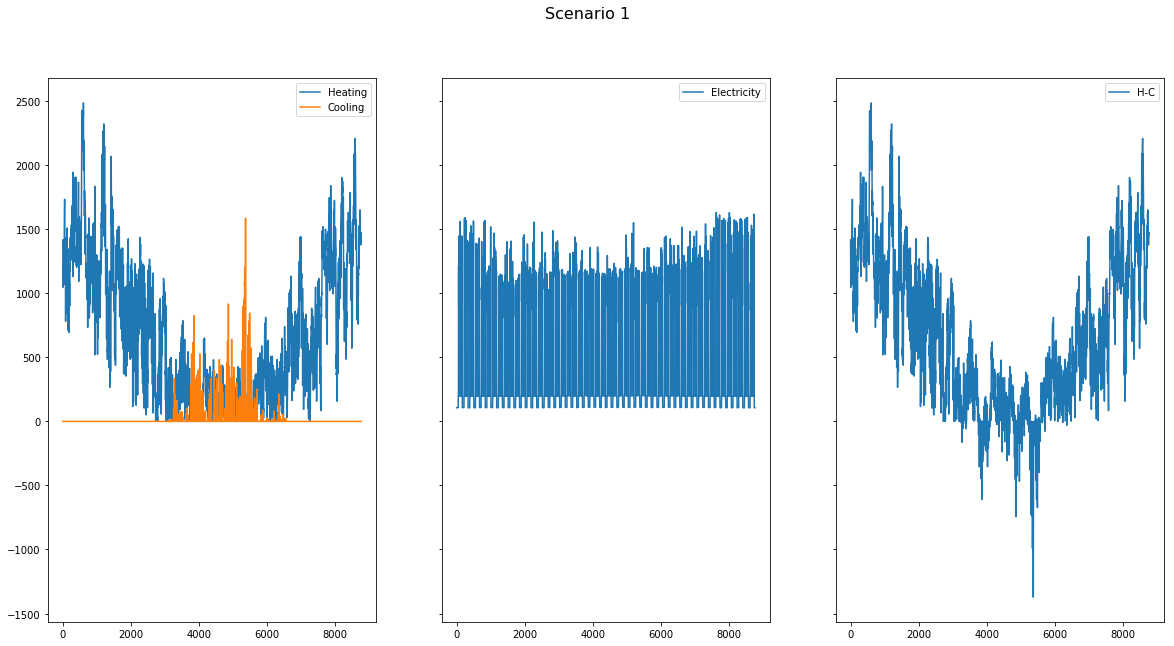

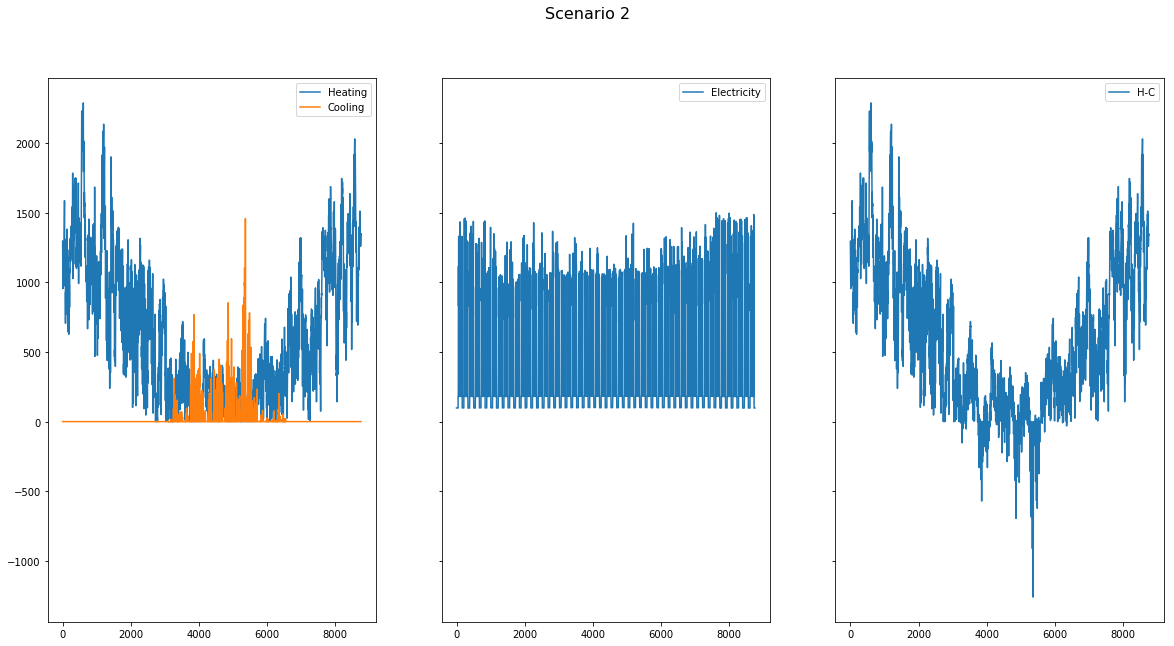

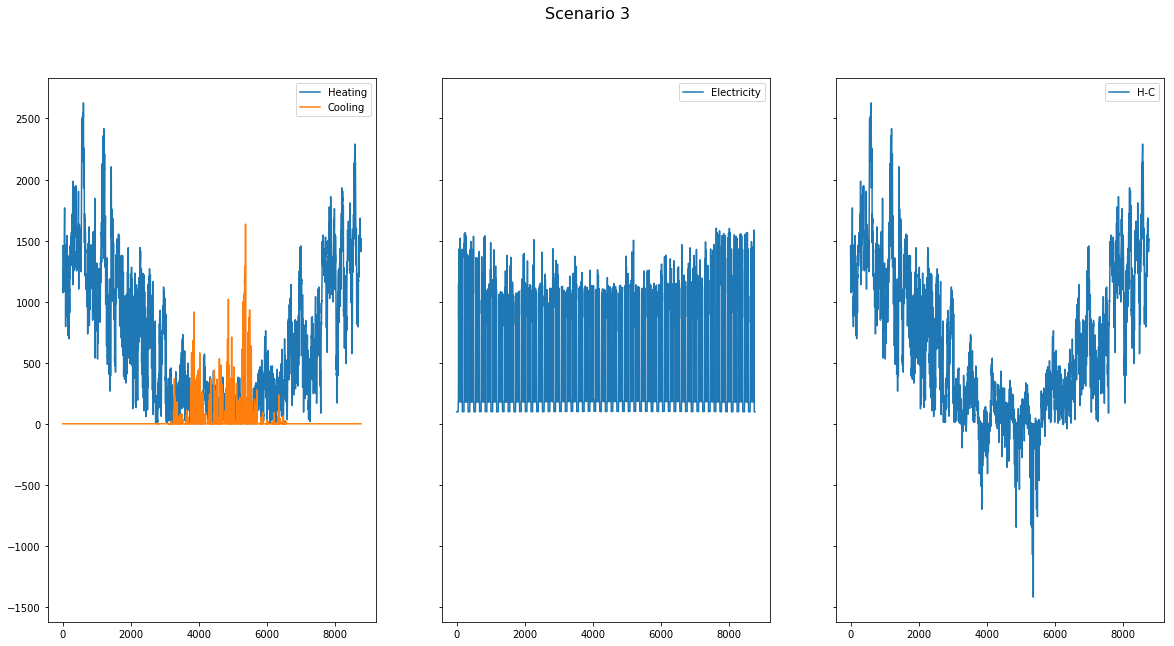

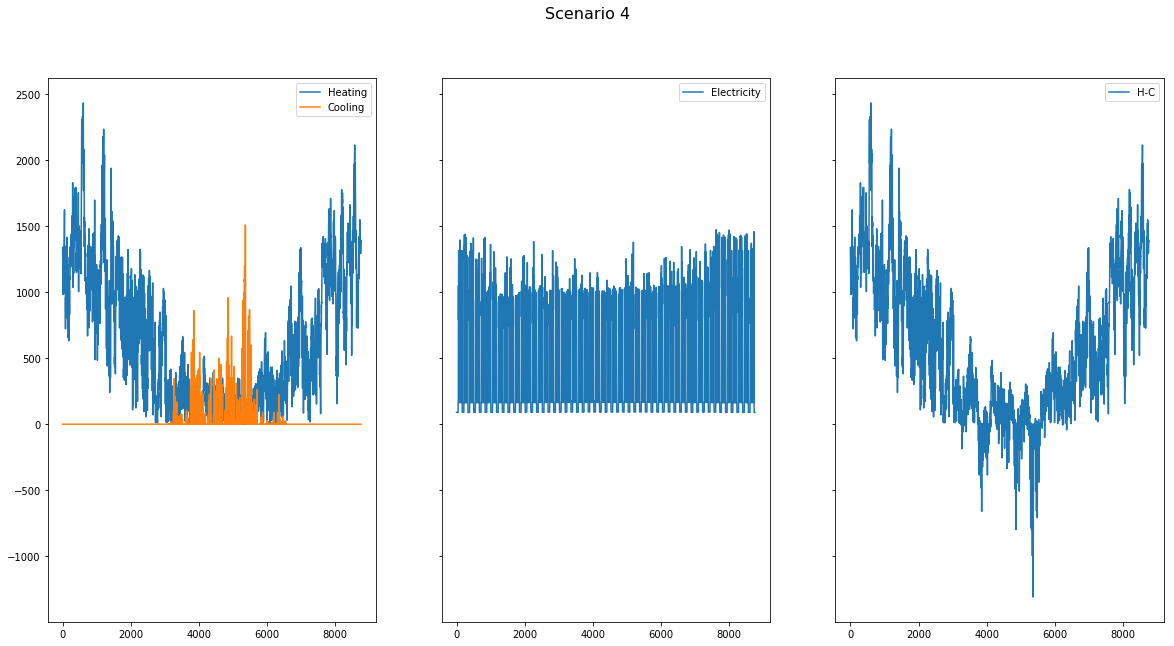

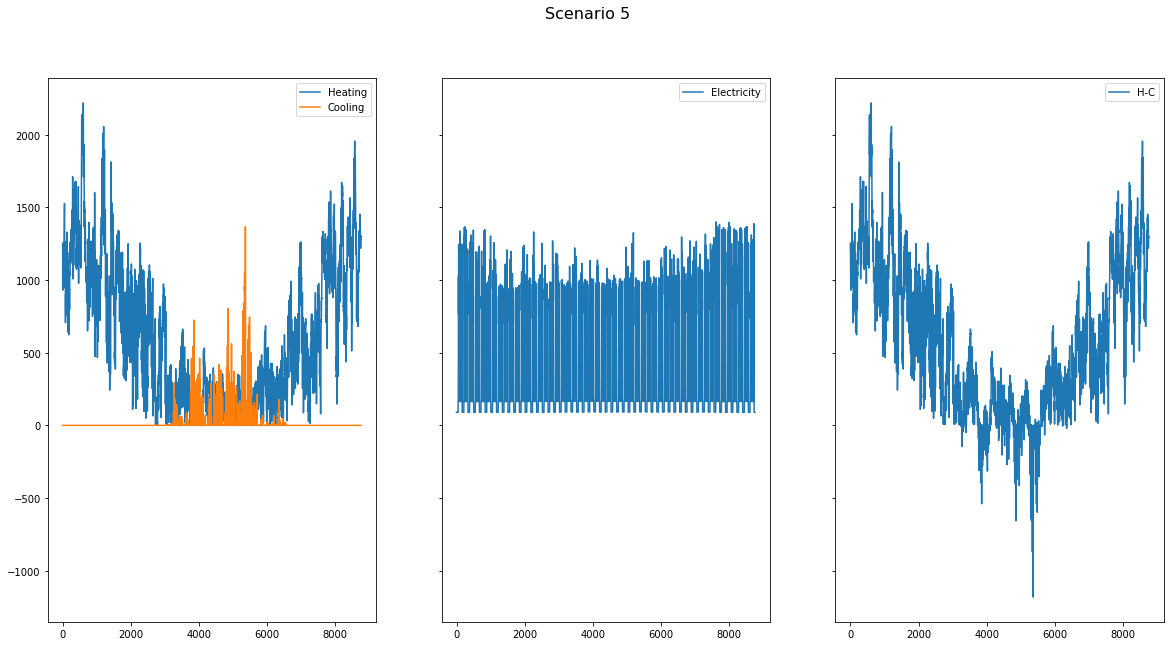

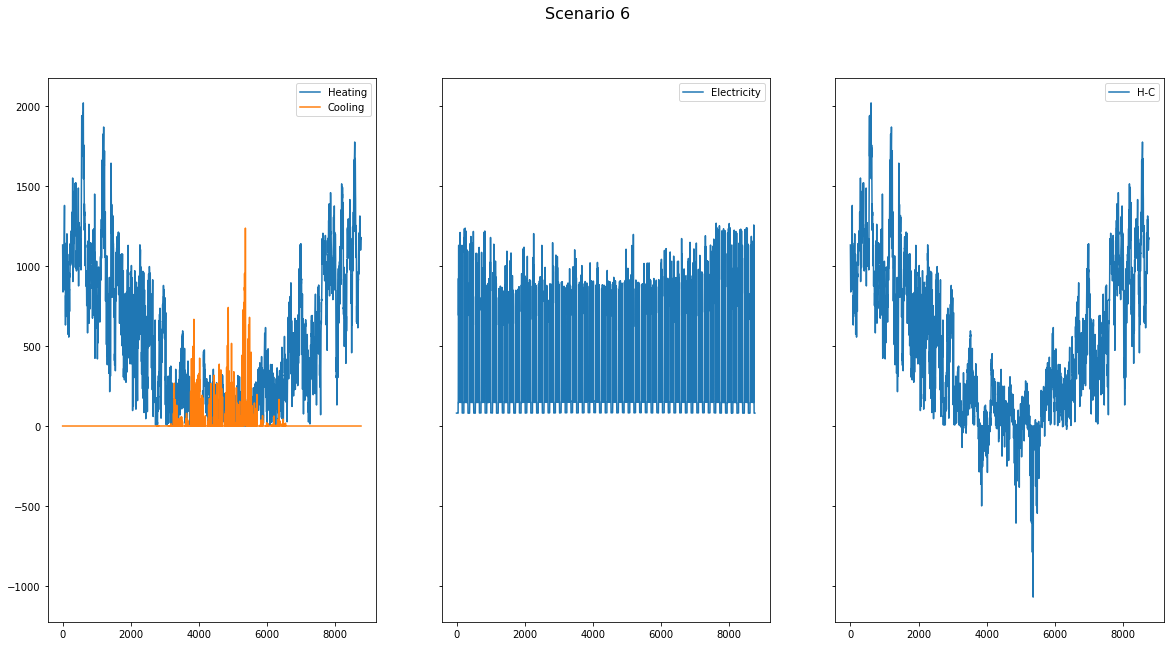

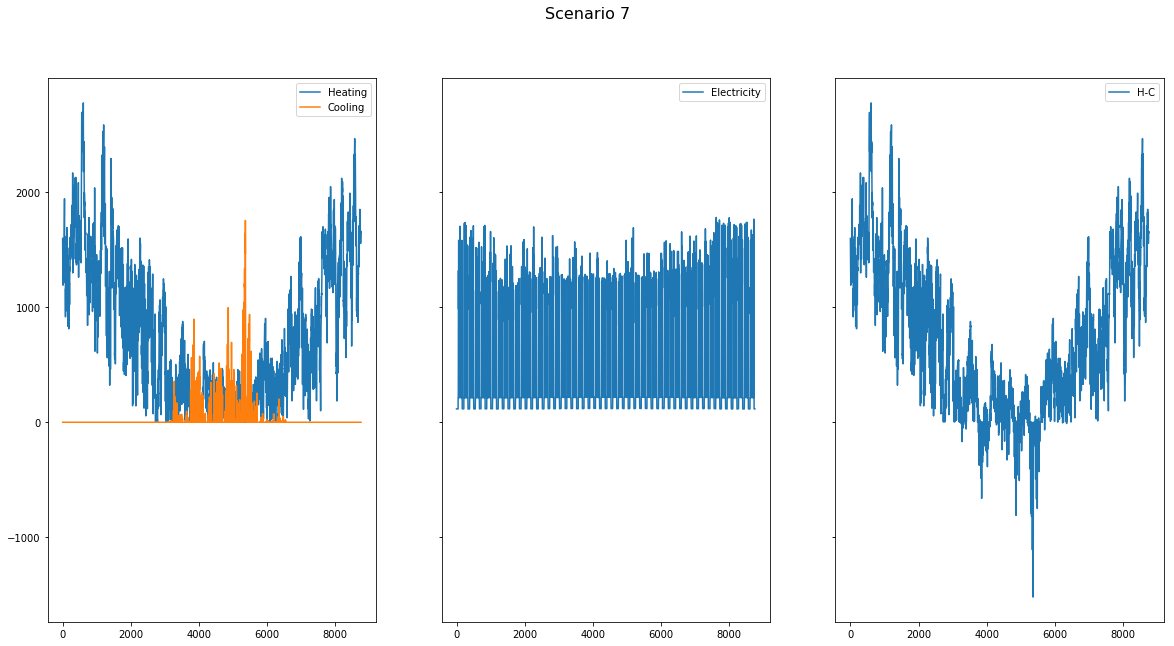

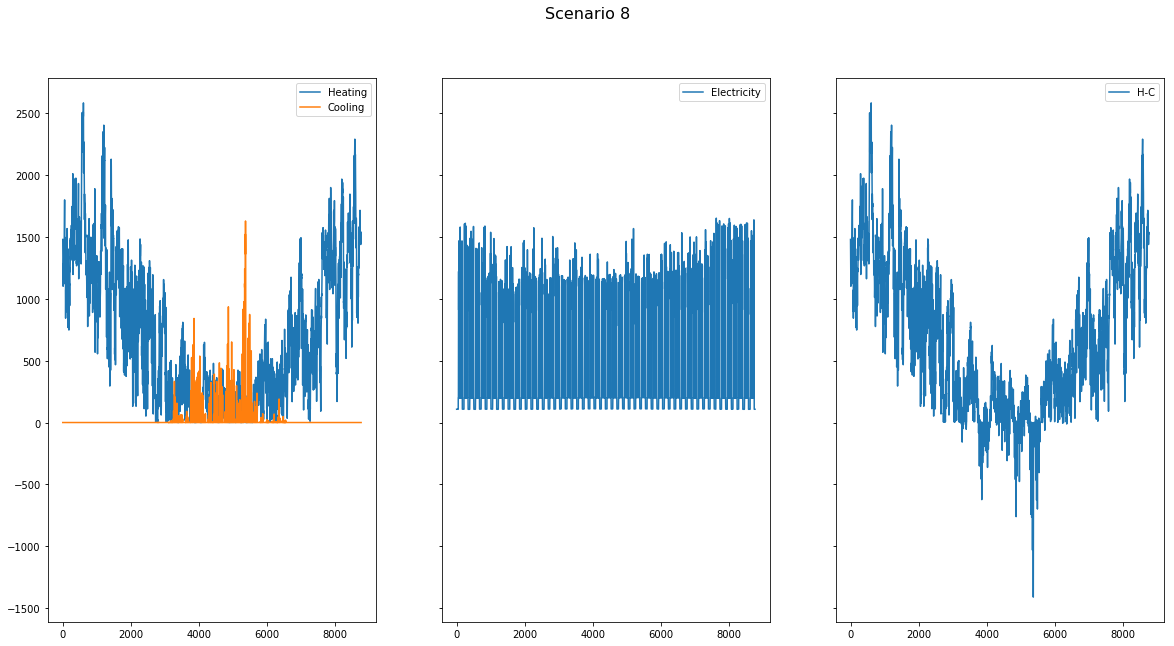

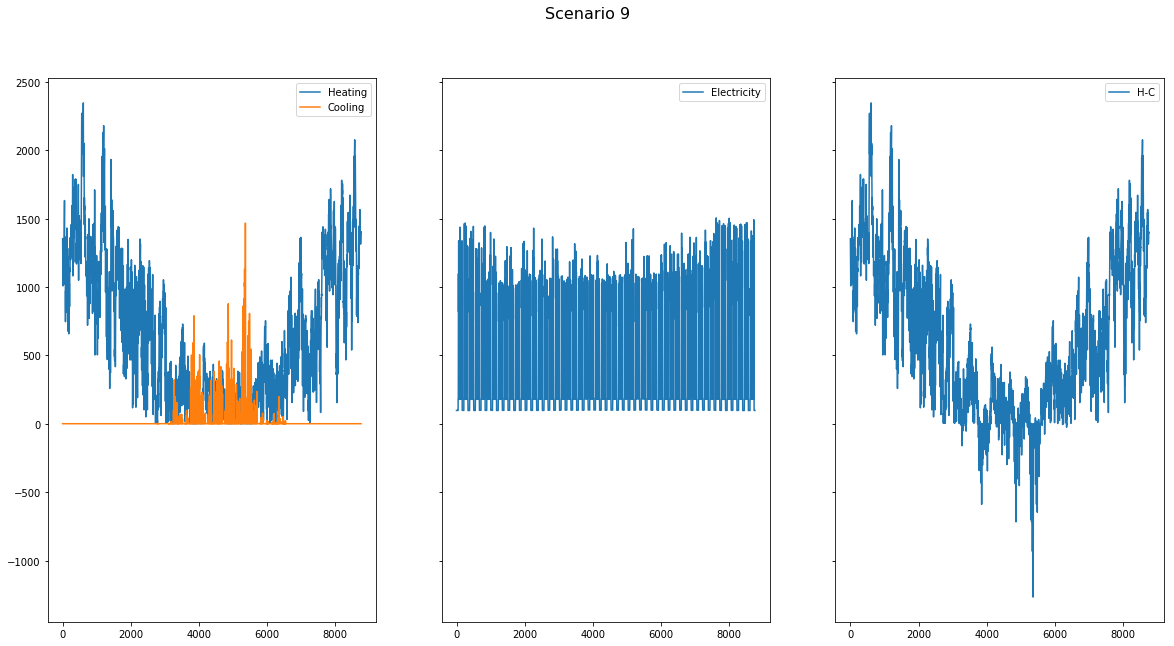

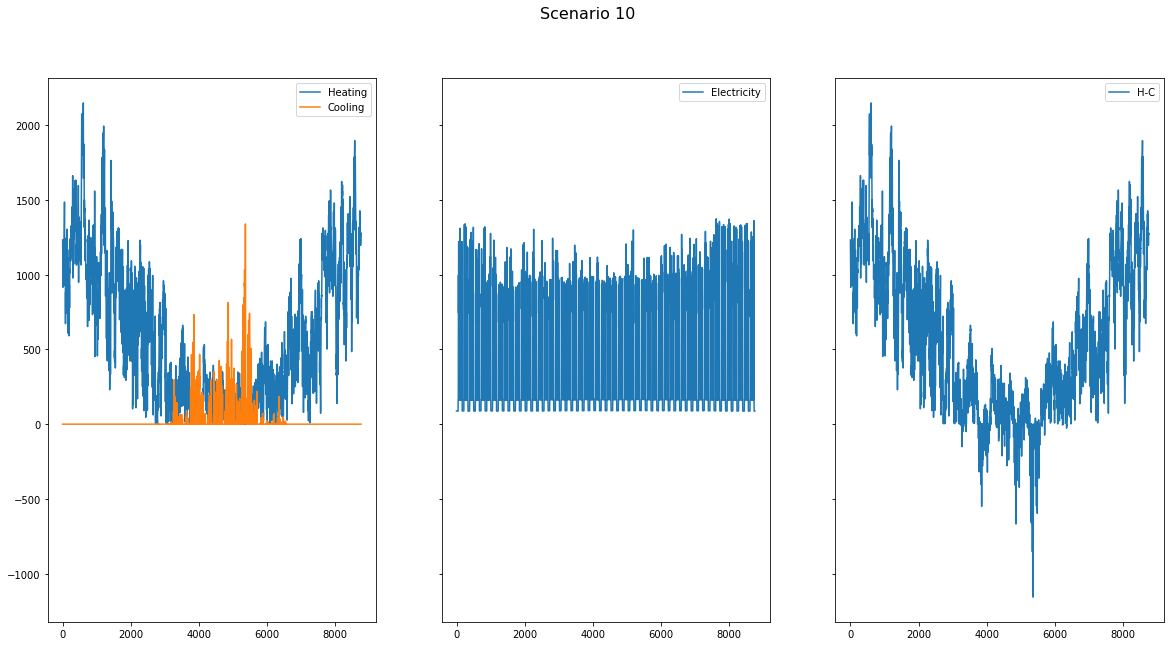

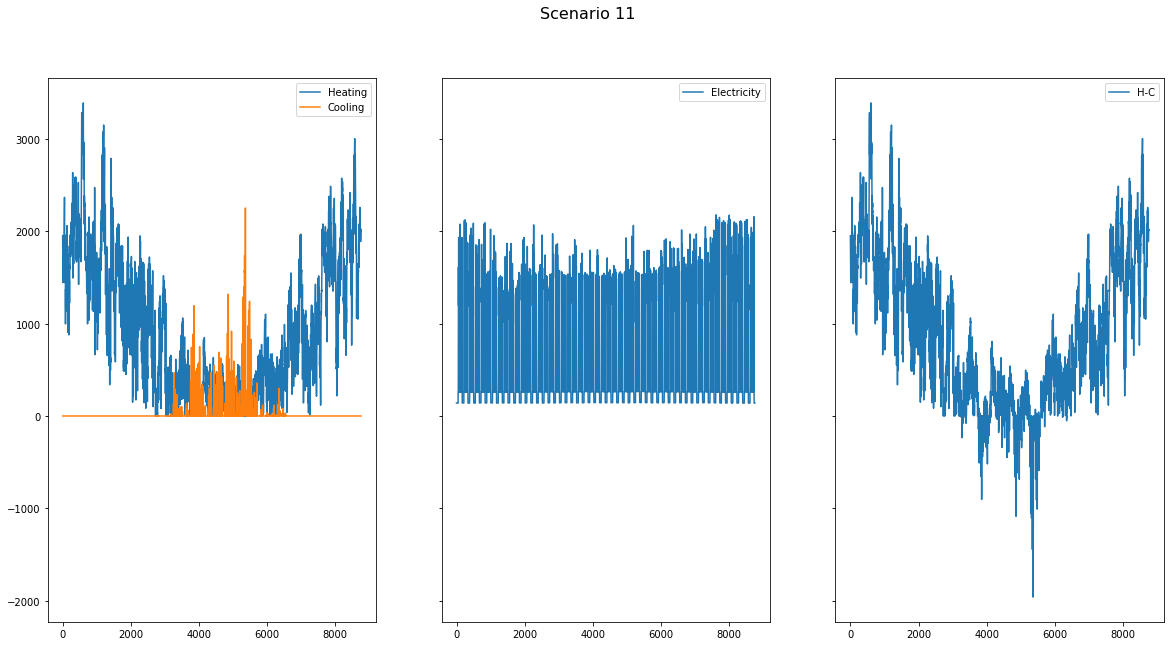

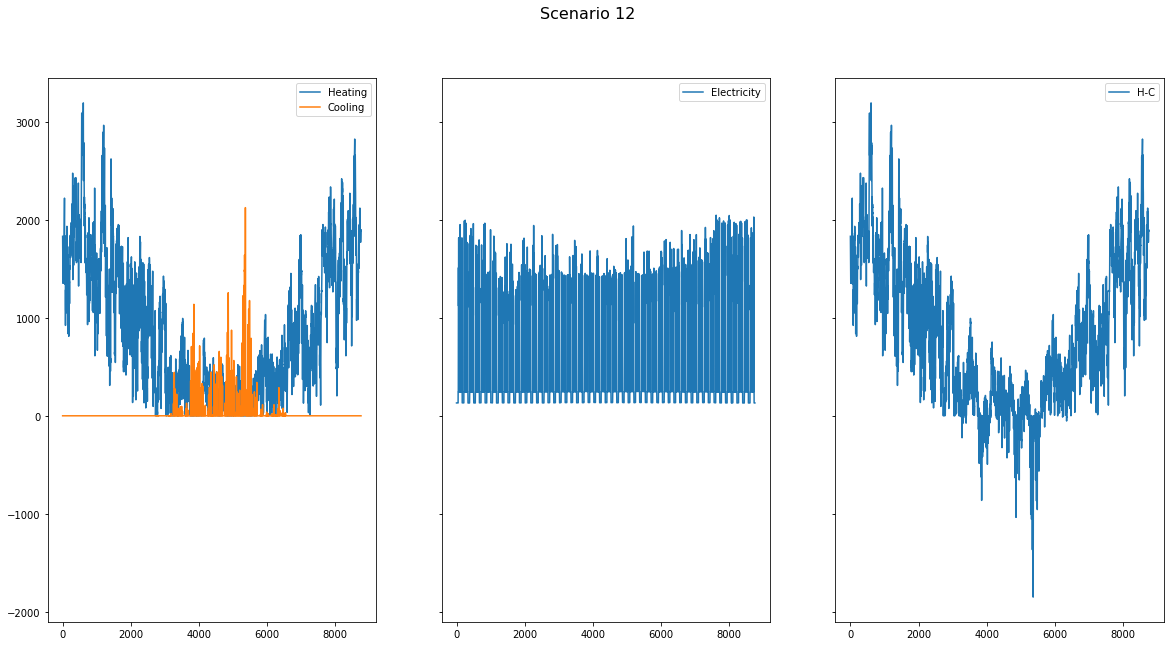

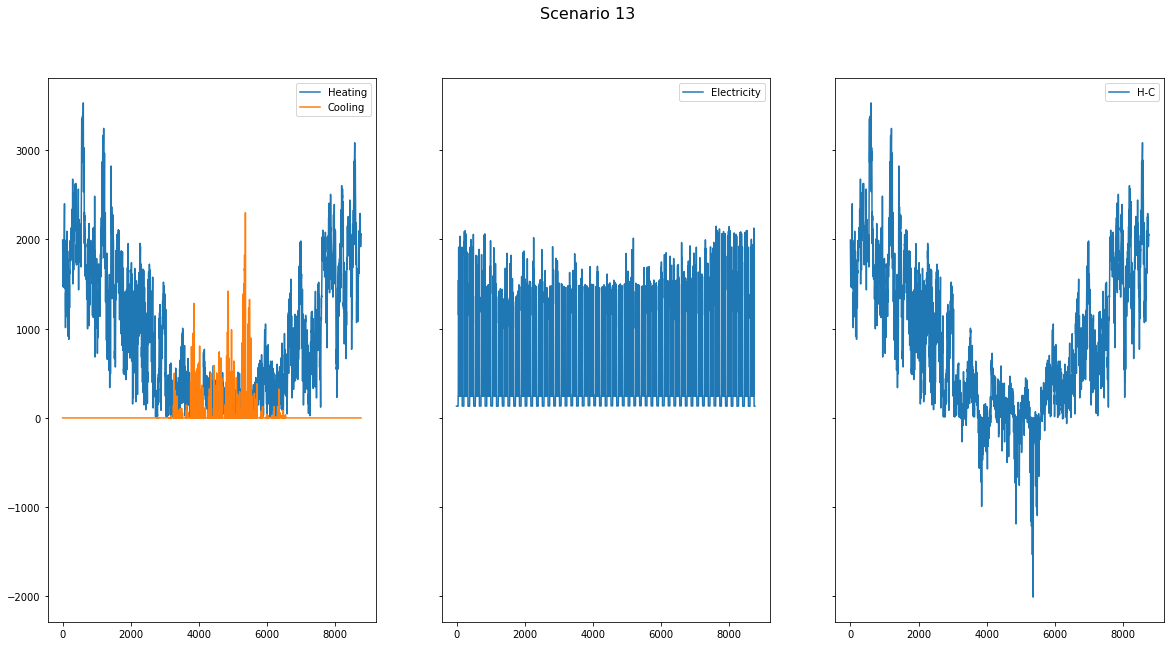

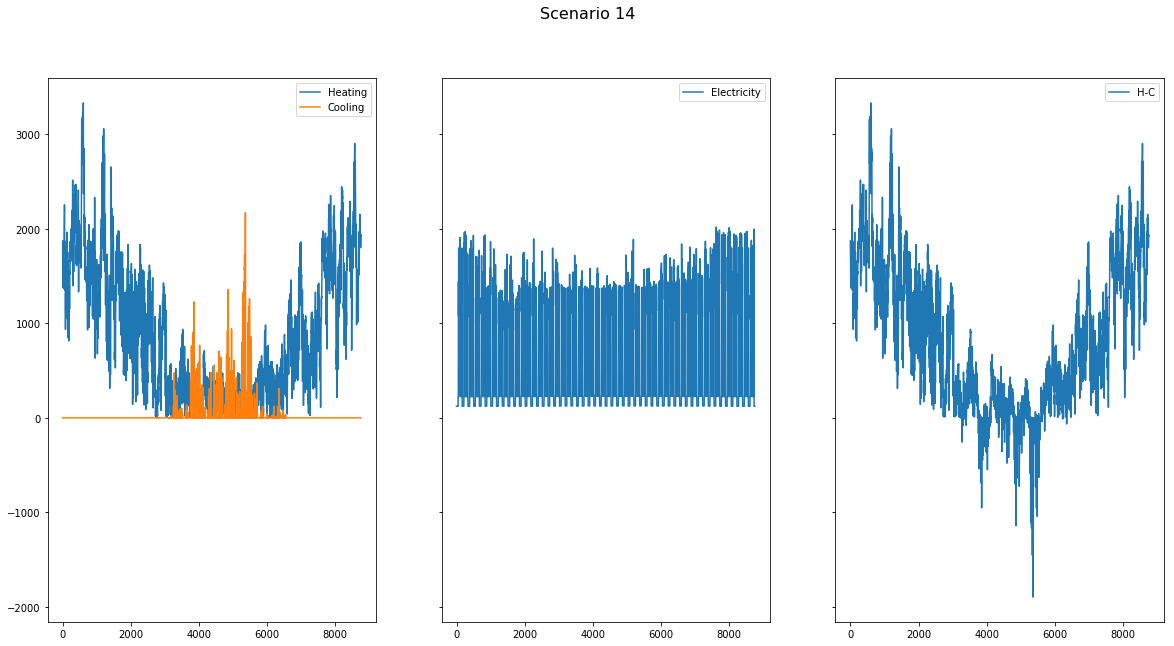

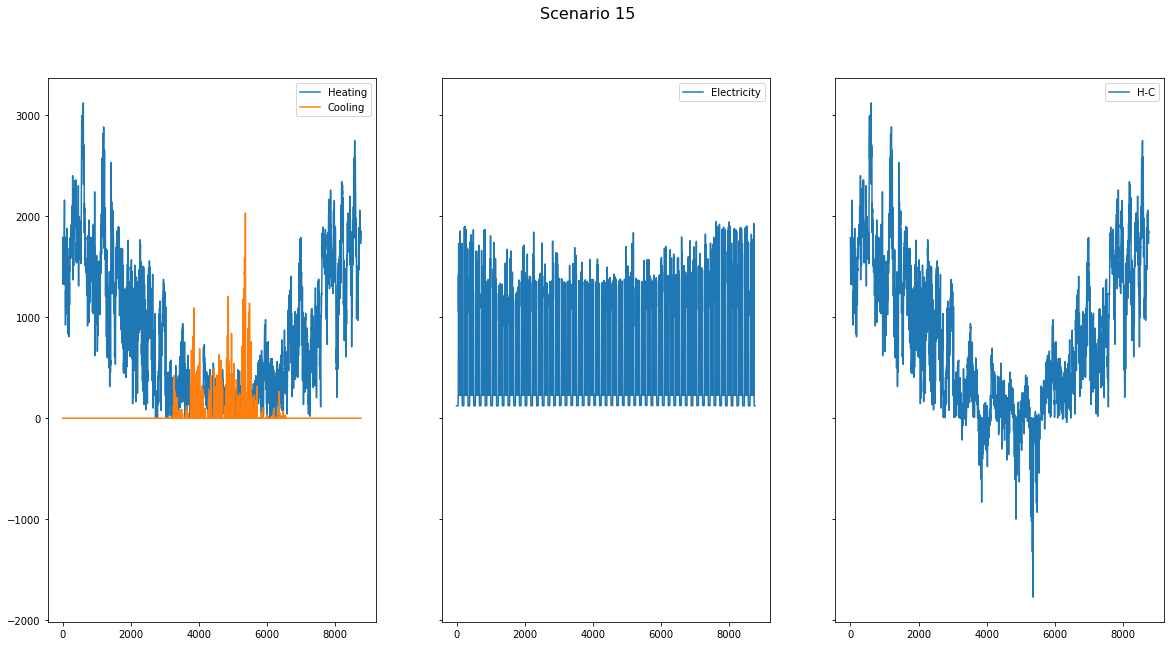

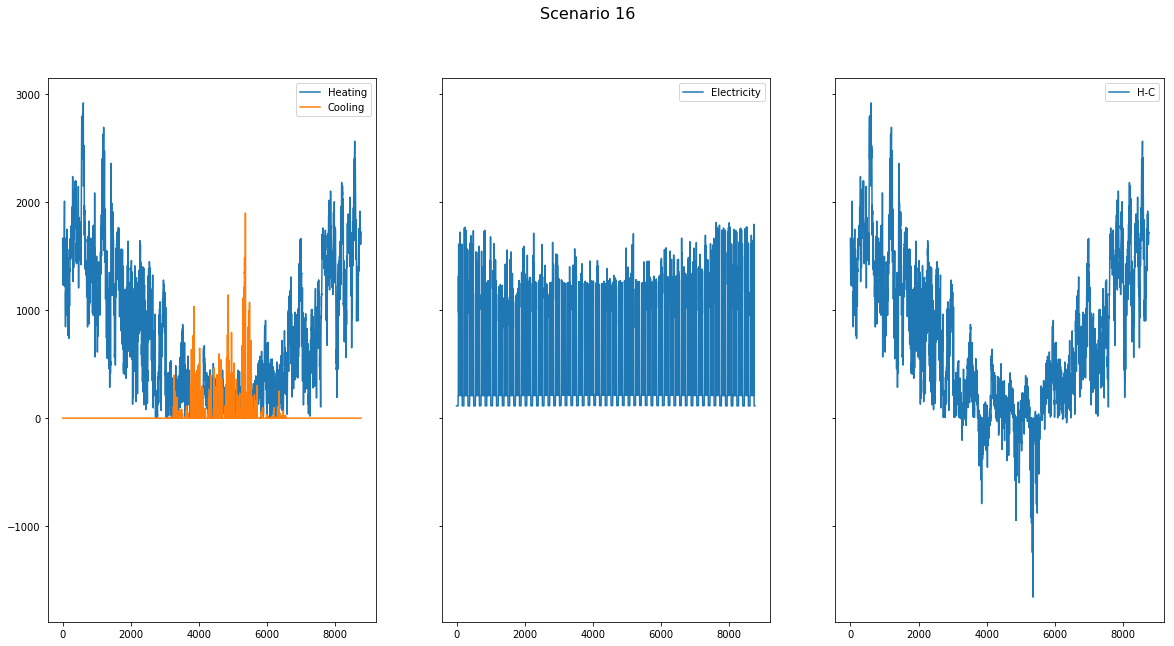

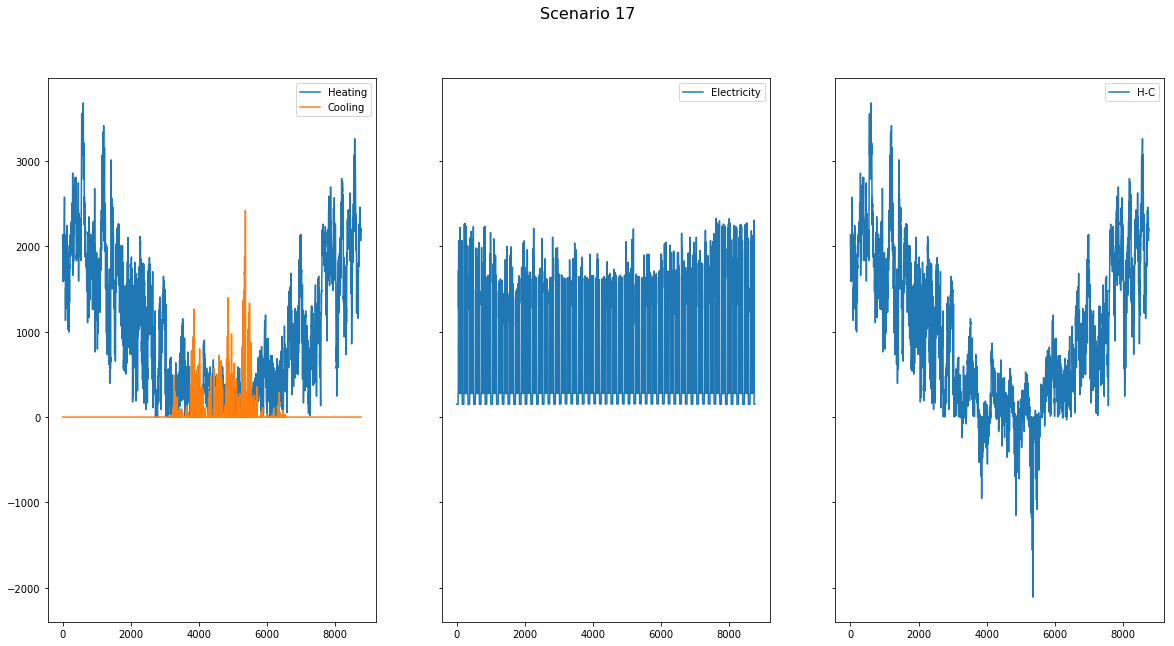

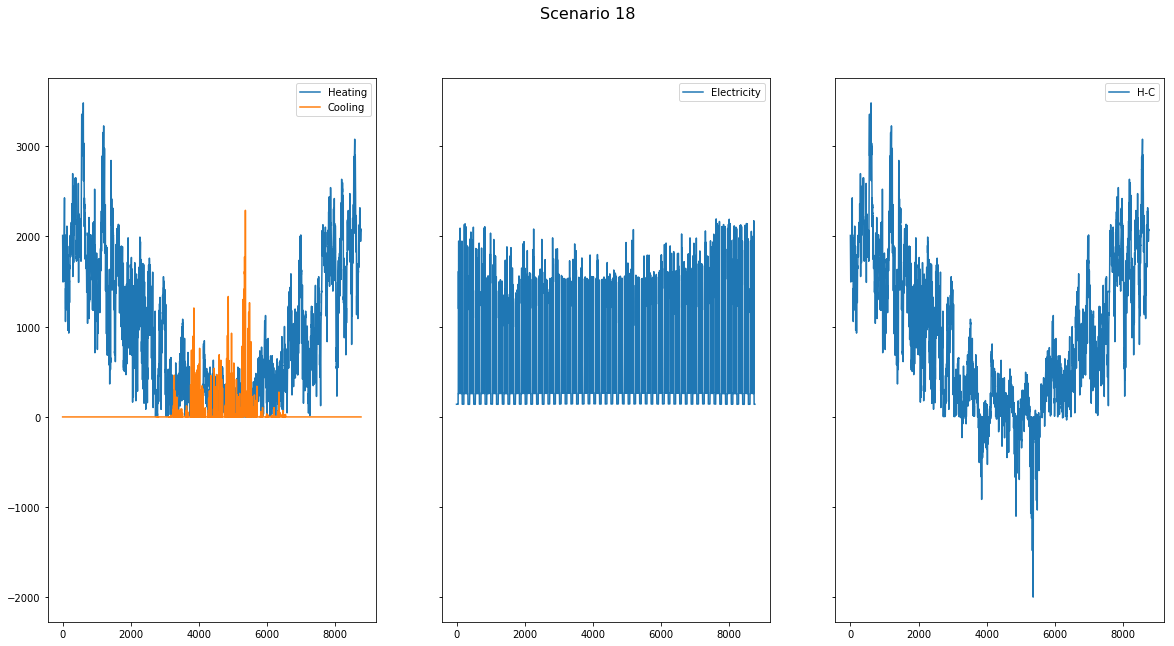

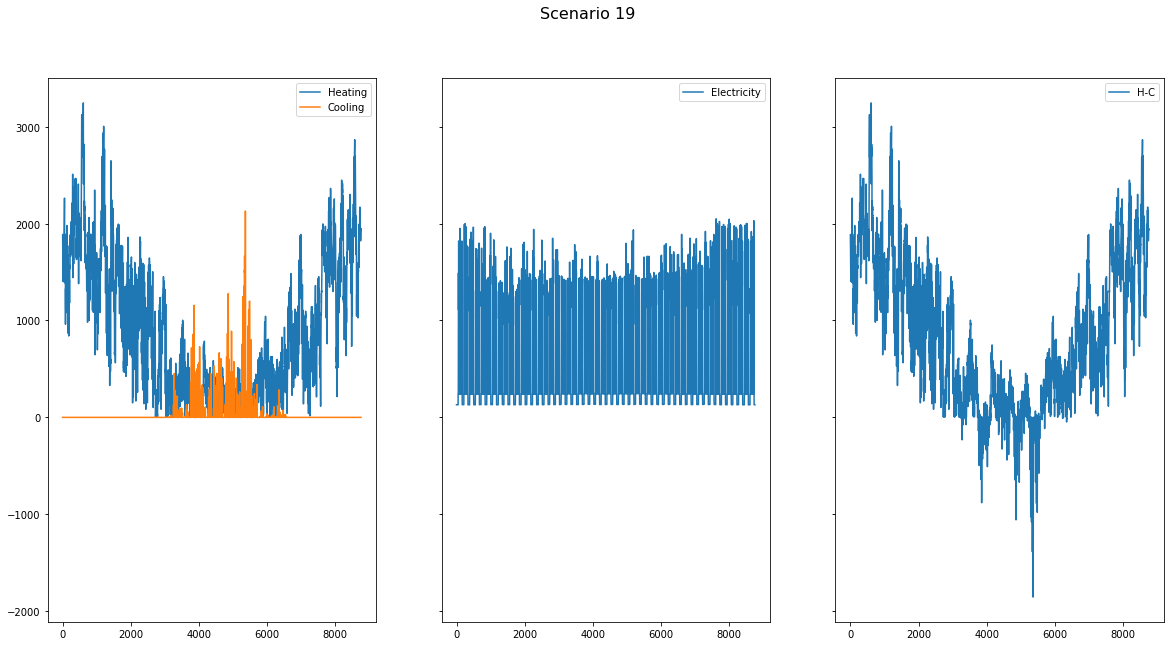

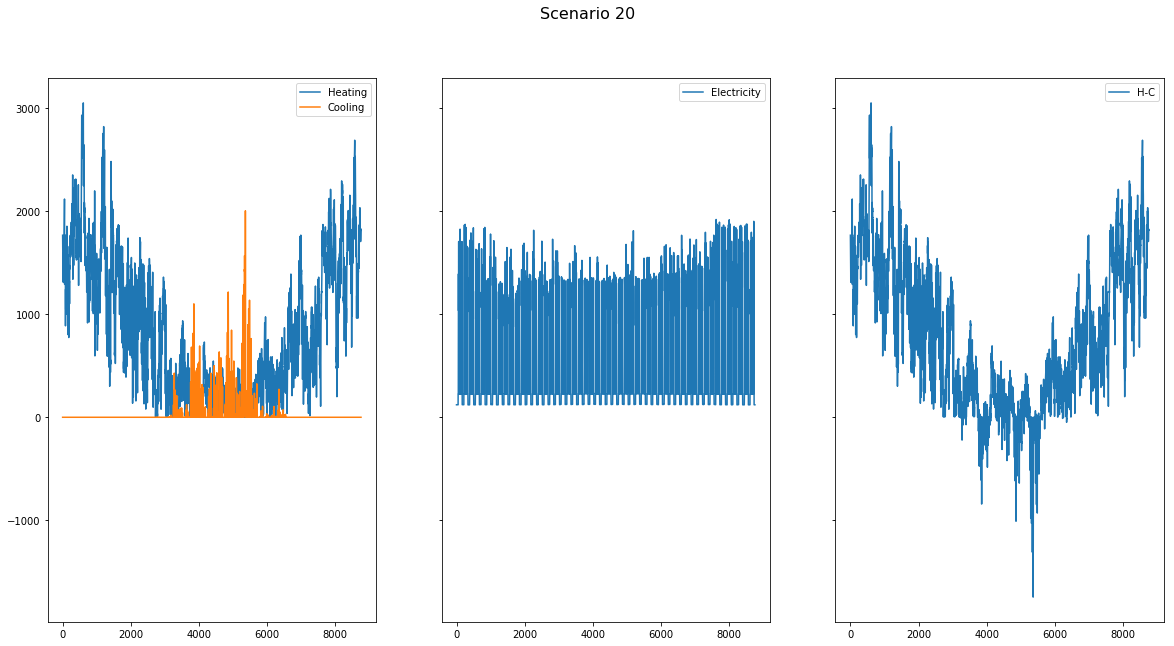

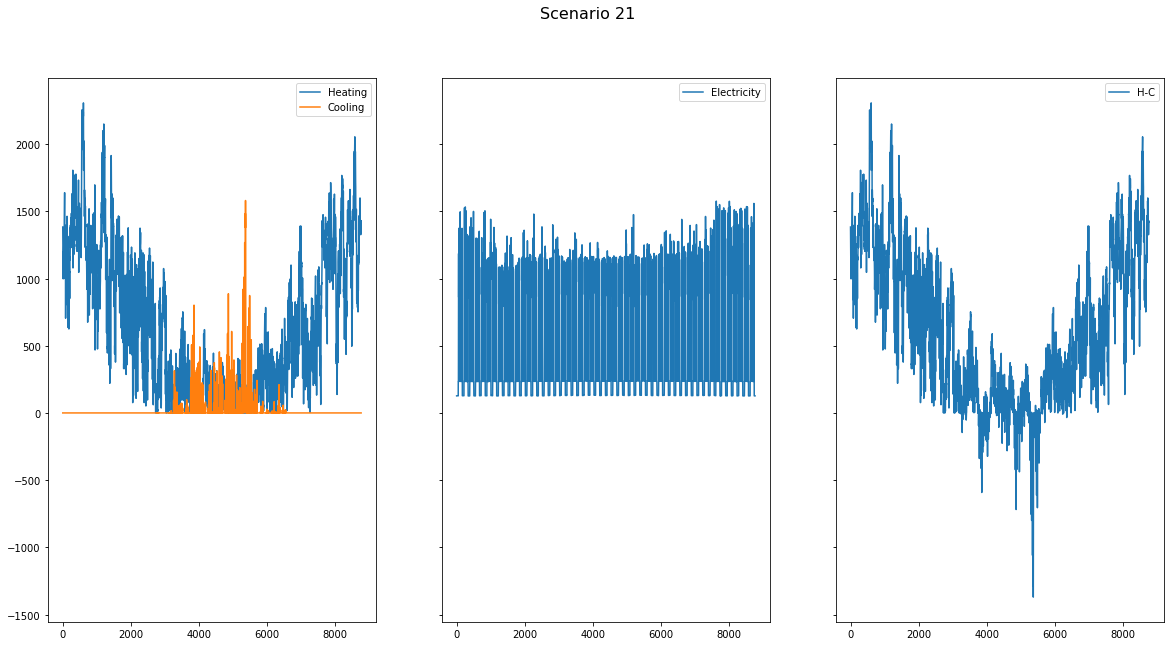

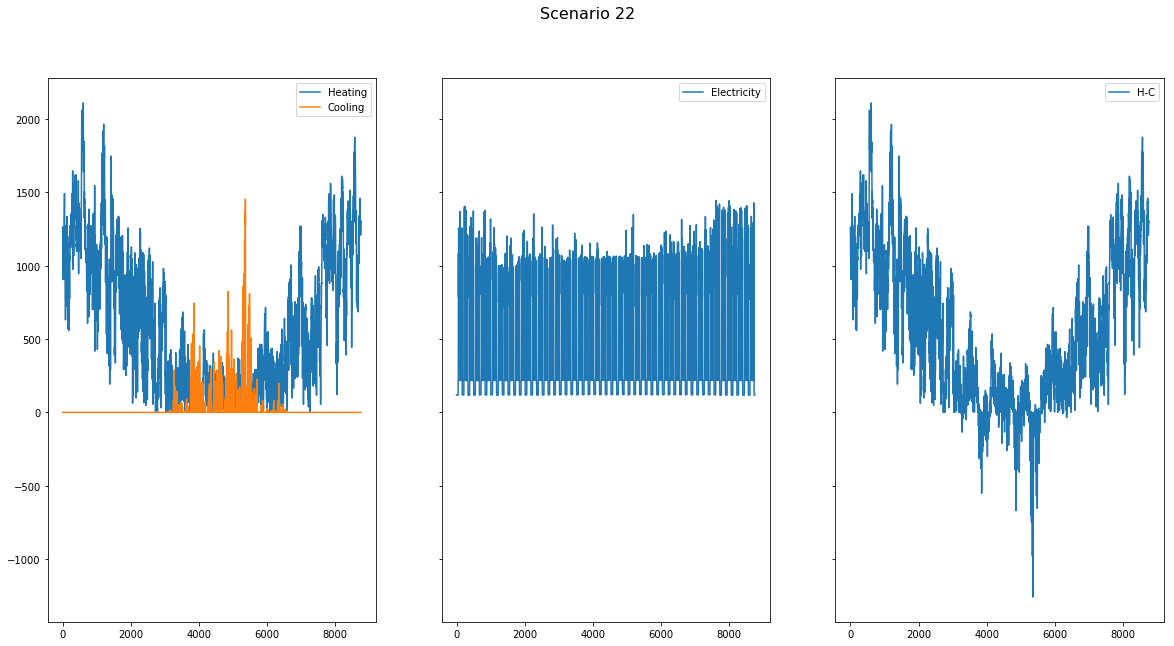

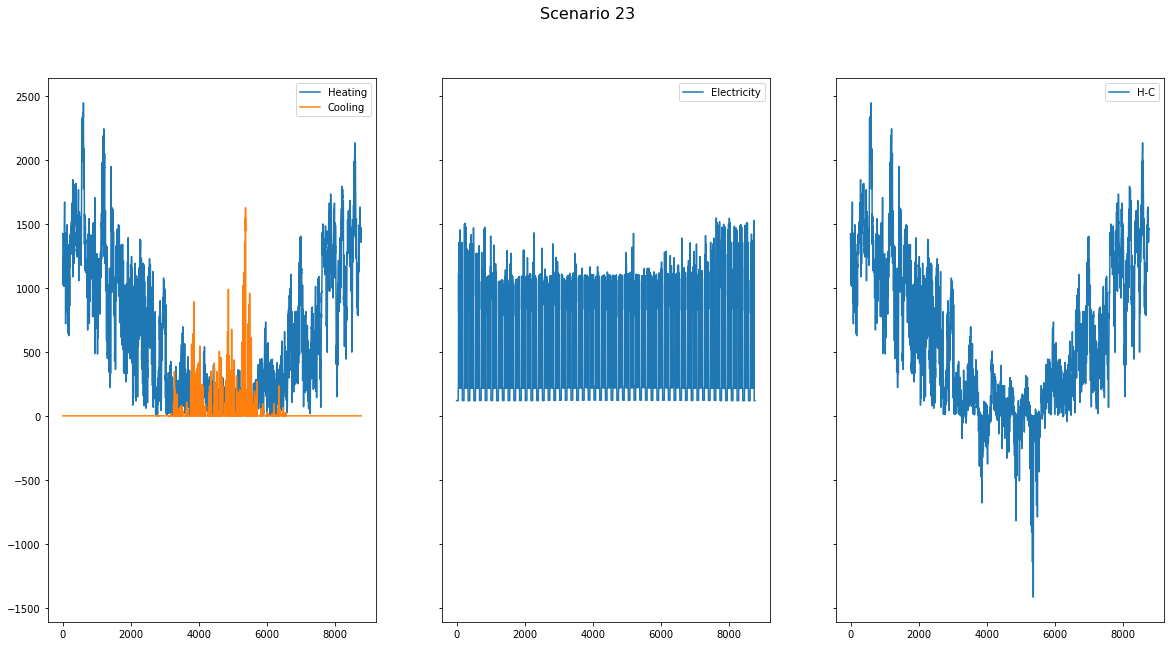

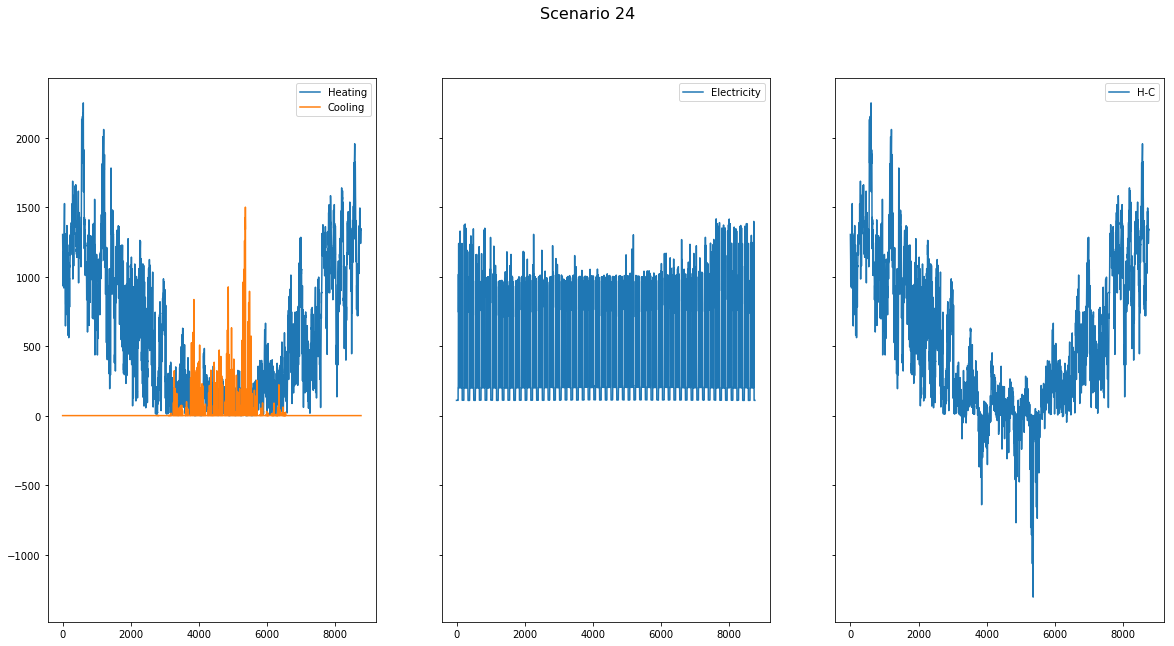

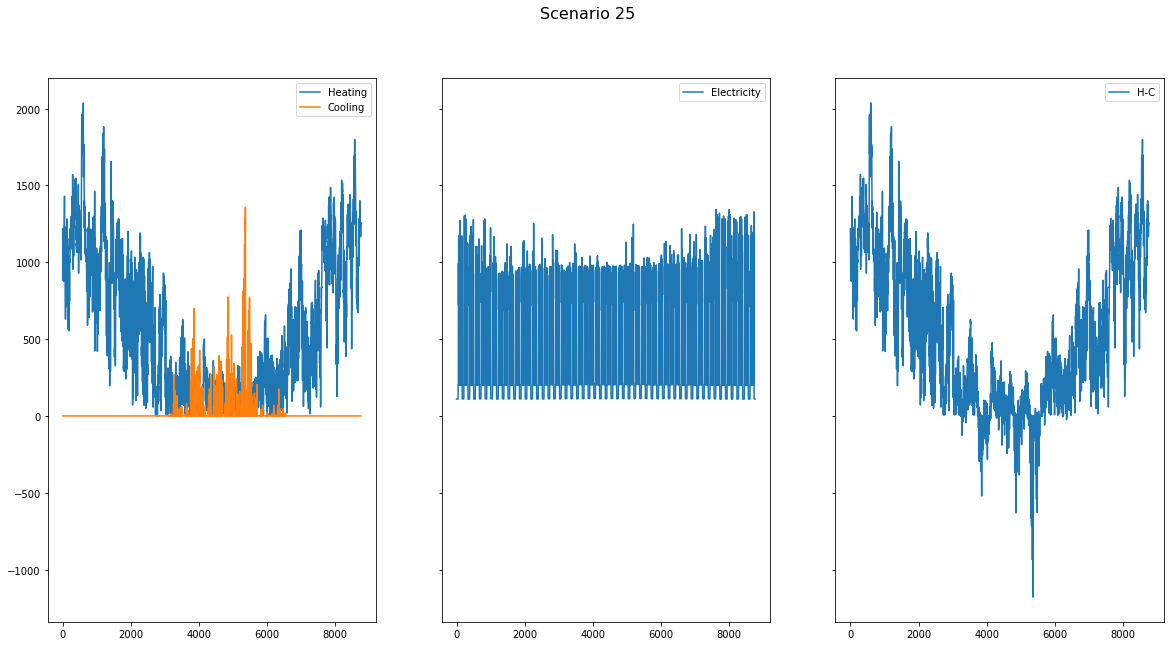

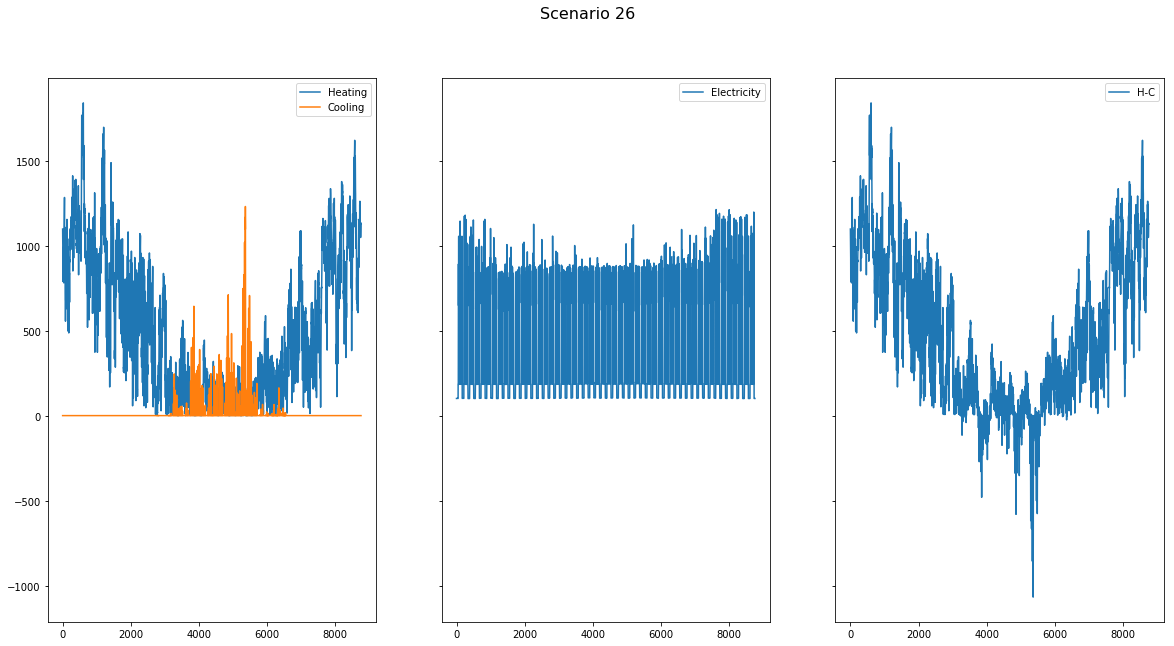

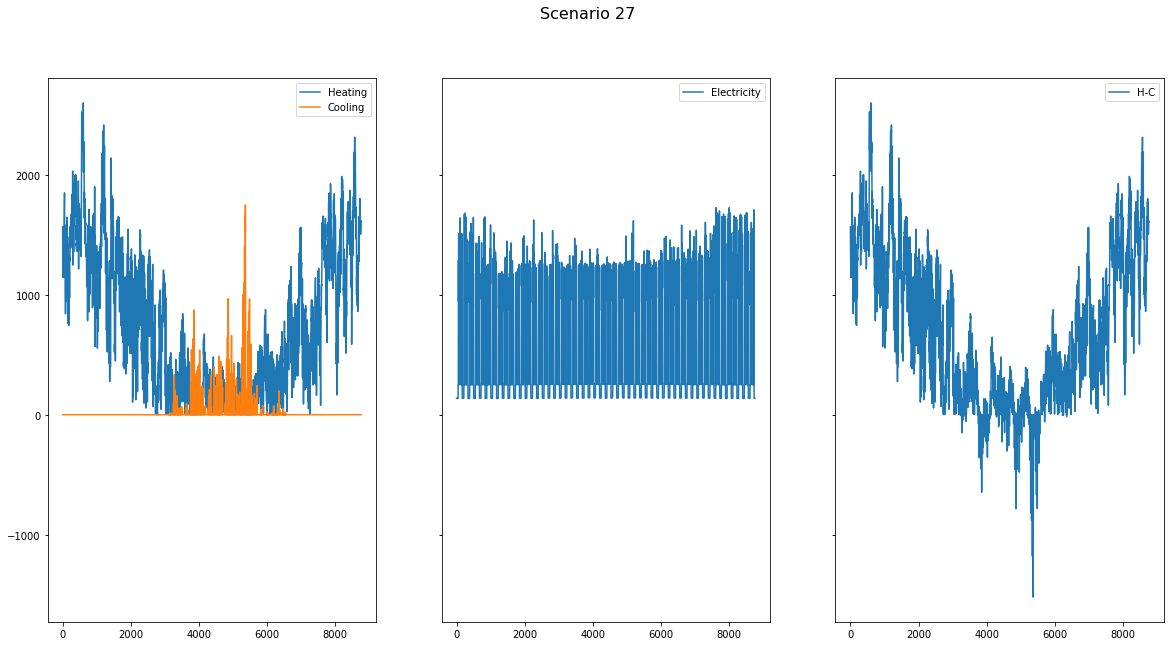

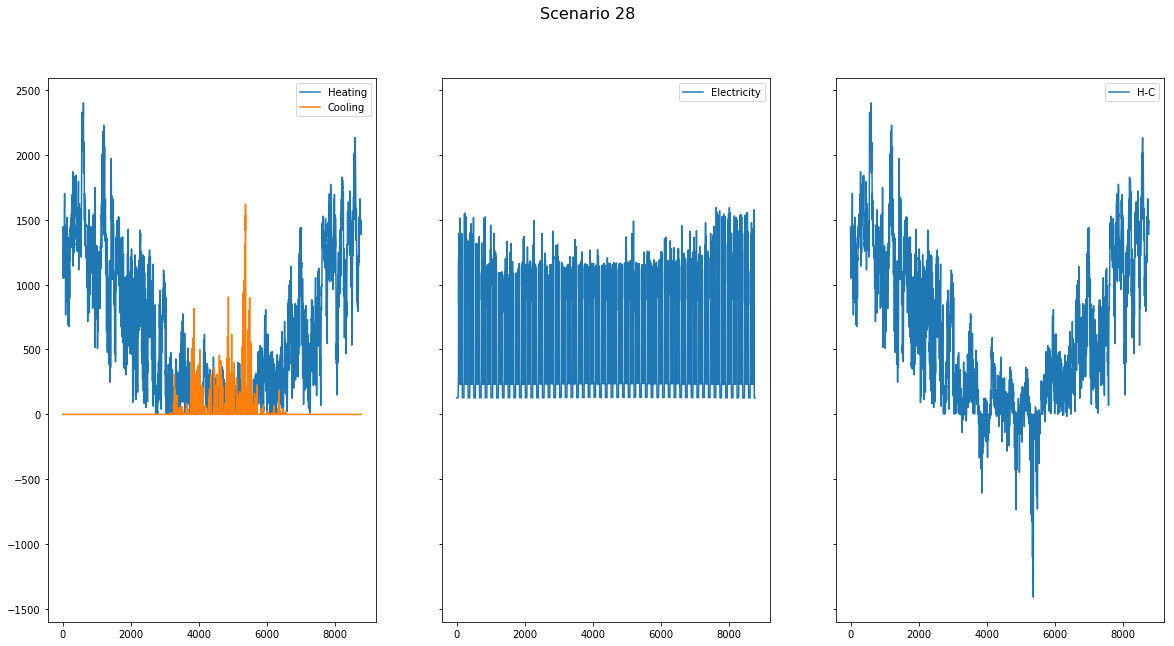

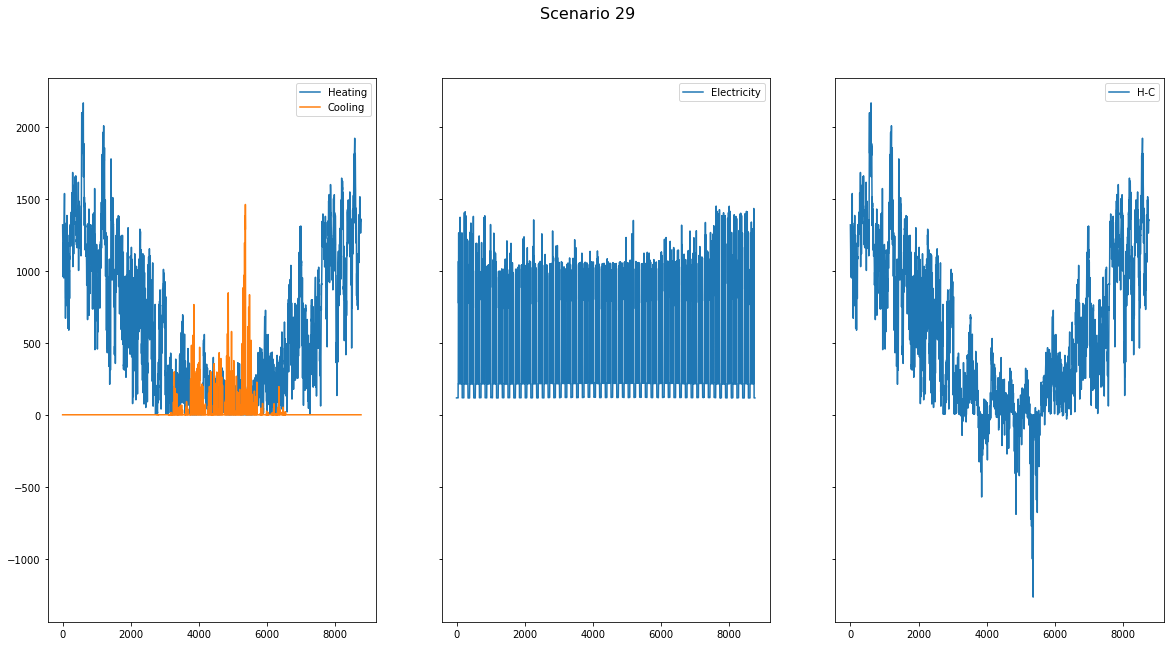

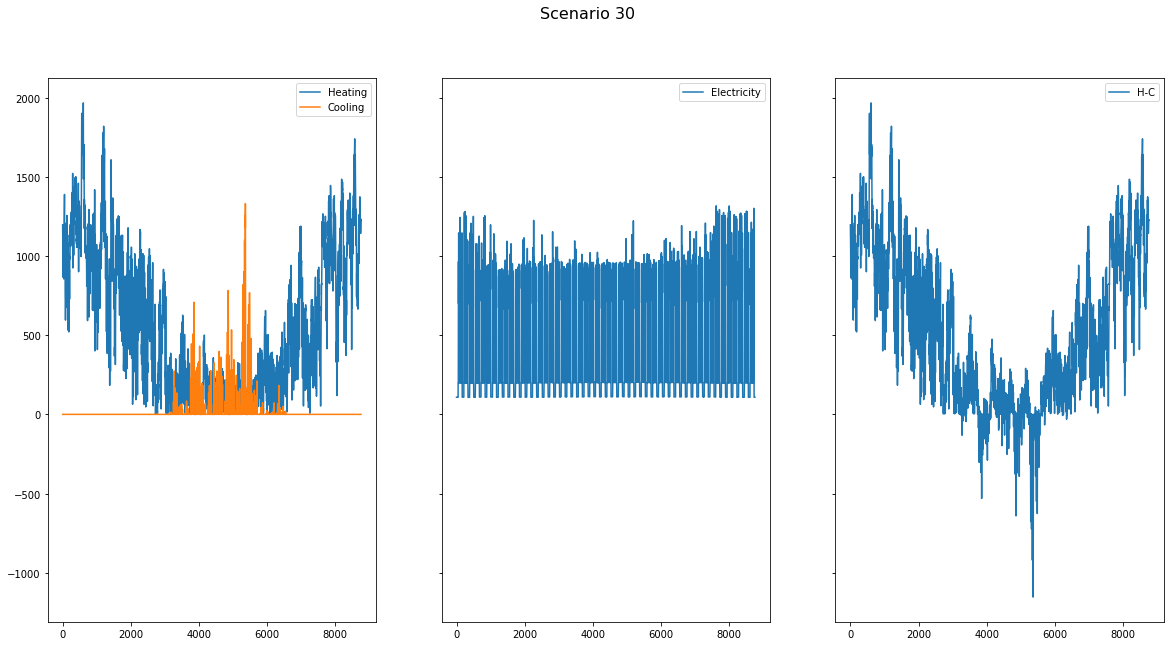

In [397]:
for keys in Scenarios:
    fig, (ax, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(20,10))
    Scenarios[keys].plot(y=['Heating','Cooling'],kind='line', ax=ax)
    Scenarios[keys].plot(y=['Electricity'],kind='line', ax=ax2)
    Scenarios[keys].plot(y=['H-C'],kind='line', ax=ax3)
    plt.suptitle('Scenario '+ str(keys+1), fontsize=16)
    plt.show()

# Plot specific demand types for specific timesteps for all scenarios on one graph

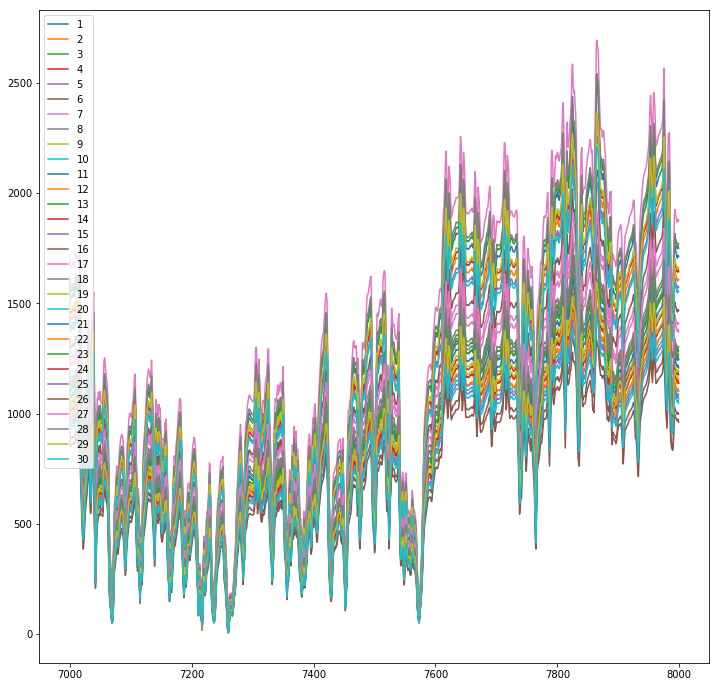

In [389]:
df_5=pd.DataFrame()
width = 12
height = 12
plt.figure(figsize=(width, height))
for key, data_list in Scenarios.items():
    #print(key, data_list['Heating'],data_list['Cooling'],data_list['H-C']) 
    #print(key)
    #Scenarios.items().plot(y=['Heating','Cooling'],kind='line')
    #df_5.append(data_list['Scenario no.'],key+1)
    #fig, (ax) = plt.subplots(ncols=1, sharey=True)   
    #data_list.plot(y=['Heating'],kind='line', ax=ax)
    #plt.plot(data_list['Heating'])
    #plt.plot(data_list['Cooling'])
    #print(data_list)
    plt.plot(data_list['H-C'].iloc[7000:8000],label=key+1)
    plt.legend(loc='upper left') 


